In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import seaborn.objects as so

In [9]:
df = pd.read_csv("../Data/private2.csv", index_col=0)

In [10]:
df['UACE YEAR'] = df['UACE YEAR'].astype('int64')

In [11]:
df

,APPLICATION NO,SCHOOL INDEX,INDEX NO,NAME,GENDER,UACE YEAR,CODE,DISTRICT,COURSE CODE,COURSE NAME,TOTAL WEIGHT,WEIGHT RANGE,SCHOOL
0,23APF412304454141015,U0391,U0391/673,LUKABWE DOUGLAS MARK,M,2022,42.0,MUKONO,ACC,BSC. Accounting (EVE),42.2,Very Good,"ST.JOSEPH'S S S, NAGGALAMA"
1,23APF345674424112360,U1249,U1249/532,LULE ISAAC,M,2022,40.0,MPIGI,ACC,BSC. Accounting (EVE),41.1,Very Good,KINAAWA HIGH SCHOOL
2,23APF1361730063122187,U0459,U0459/676,HAULAH SULAIT BIIRA,F,2022,21.0,KASESE,ACC,BSC. Accounting (EVE),40.6,Very Good,KAWEMPE MUSLIM SS
3,23APF519647933132646,U1611,U1611/887,NAMBALYE EVELYNE,F,2022,33.0,MASAKA,ACC,BSC. Accounting (EVE),38.8,Good,OURLADY OF AFRICA SS NAMILYANGO
4,23APF1481620160129238,U0083,U0083/555,KEMIGISHA RUSIA,F,2022,65.0,IBANDA,ACC,BSC. Accounting (EVE),38.4,Good,IMMACULATE HEART GIRLS SCHOOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,23APF727648568141557,U0017,U0017/548,KIZZA VANESSA ITRONCE,F,2022,17.0,KAMULI,VET,B. Veterinary Medicine,41.8,Very Good,IGANGA SECONDARY SCHOOL
14911,23APF963075058135059,U0033,U0033/581,OTIM DANIEL,M,2022,31.0,LIRA,VET,B. Veterinary Medicine,41.7,Very Good,"ST MARY'S COLLEGE, KISUBI"
14912,23APF1618205309130850,U0077,U0077/736,MUKETI JOVIA,F,2022,74.0,MARACHA,VET,B. Veterinary Medicine,41.6,Very Good,GOMBE SECONDARY SCHOOL
14913,23APF575513287117711,U0077,U0077/564,AWOR REBECCA,F,2022,31.0,LIRA,VET,B. Veterinary Medicine,40.4,Very Good,GOMBE SECONDARY SCHOOL


In [14]:
# Total Weight analysis
totalWeight_cat = df.groupby(['WEIGHT RANGE'])['INDEX NO'].count()

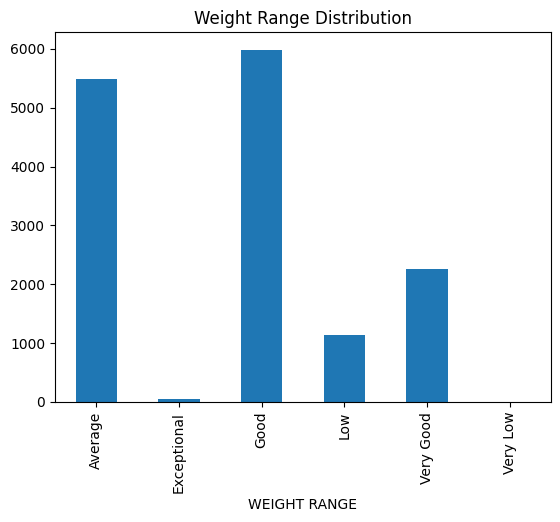

In [20]:
totalWeight_cat.plot(
    title="Weight Range Distribution",
    y="Student",
    
    kind="bar");

In [36]:
# Average Total Weight vs Gender
df.groupby(['GENDER'])['TOTAL WEIGHT'].mean()

GENDER
F    31.686487
M    31.054889
Name: TOTAL WEIGHT, dtype: float64

In [43]:
# Total Weight Vs UACE Year
yearTotalWeight = df.groupby(['UACE YEAR'])['TOTAL WEIGHT'].mean()
yearTotalWeight

UACE YEAR
1995    21.650000
1996    32.033333
1999    20.866667
2000    32.500000
2001    32.500000
2002    22.520000
2003    26.050000
2004    24.150000
2005    29.352381
2006    26.627273
2007    31.911111
2008    29.335000
2009    30.114286
2010    32.034783
2011    30.168966
2012    34.700000
2013    28.612500
2014    30.438462
2015    28.894118
2016    28.629091
2017    28.022667
2018    29.400000
2019    28.439485
2020    28.658130
2022    31.627146
Name: TOTAL WEIGHT, dtype: float64

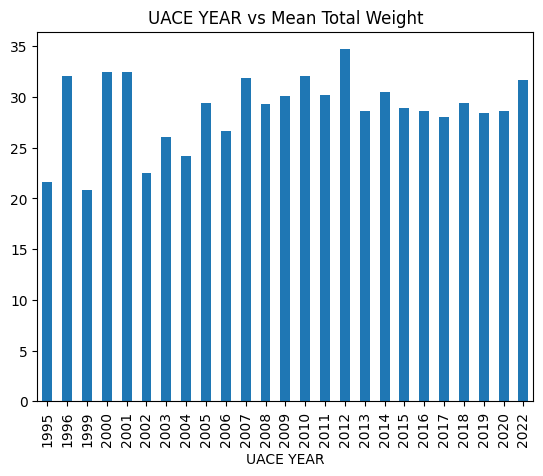

In [45]:
df.groupby(['UACE YEAR'])['TOTAL WEIGHT'].mean().plot(
    title="UACE YEAR vs Mean Total Weight",
    y="Weight",
    kind="bar"
);
plt.savefig("../Data/yearTotalWeight.png");